In [18]:
#Importing req libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, load_iris, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

#Importing keras libraries
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from keras.optimizers import Adam, SGD


In [19]:
# Set default fig size
plt.rcParams['figure.figsize'] = (20, 12)

Here we have imported the necessary libraries for building a `Simple Neural Network` . We have used the `Keras` library for building the neural network. We have used the `Sequential` model from Keras. The Sequential model is a linear stack of layers. We will be using the `Dense layer` which is a fully connected layer,`Adam optimizer` for optimization. We will use the `mean squared error` as the loss function, `ReLU` activation function for the hidden layers and the `sigmoid` activation function for the output layer. We will be using the `train_test_split` function from the sklearn library to split the dataset into training and testing sets, `matplotlib` library for plotting the graphs.

In [20]:
np.random.seed(0)

#loading dataset 
iris = load_iris()
breast_cancer = load_breast_cancer()

Text(0.5, 0, 'mean perimeter')

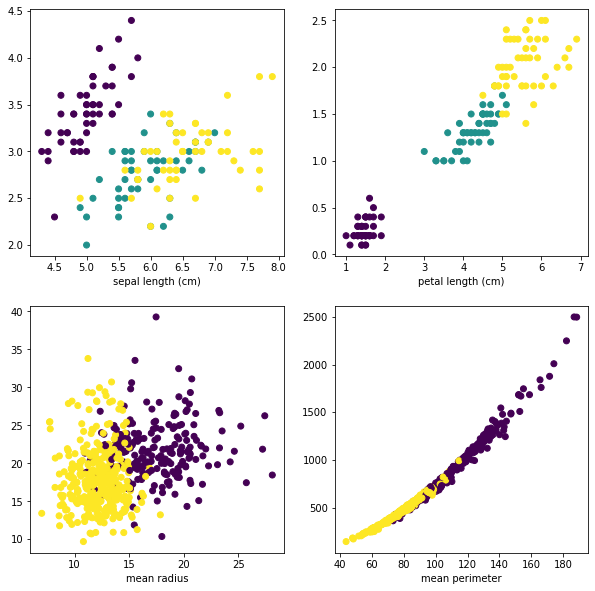

In [21]:
#plotting the random data
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1) #plt.subplot(height, width, where to plot)
plt.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
plt.xlabel(iris.feature_names[0])
#scatter plot of 2nd and 3rd feature

plt.subplot(2, 2, 2)
plt.scatter(iris.data[:, 2], iris.data[:, 3], c=iris.target)
plt.xlabel(iris.feature_names[2])

plt.subplot(2, 2, 3)
plt.scatter(breast_cancer.data[:, 0], breast_cancer.data[:, 1], c=breast_cancer.target)
plt.xlabel(breast_cancer.feature_names[0])

plt.subplot(2, 2, 4)
plt.scatter(breast_cancer.data[:, 2], breast_cancer.data[:, 3], c=breast_cancer.target)
plt.xlabel(breast_cancer.feature_names[2])

In [22]:
#splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2) #test_size=0.2 means 20% of data is used for testing and 80% for training 

Next up we will be defining the model , which is Sequential in this case and adding the layers to the model. We will be adding 3 layers to the model. The first layer will have 8 neurons and the input shape will be 4(As there are 4 features(values) in a single X_train array . The second layer will have 8 neurons and the third layer will have 3 (as there are 3 classes) neuron. We will be using the `ReLU` activation function for the hidden layers and the `softmax` activation function for the output layer. We will be using the `Adam` optimizer for optimization and the `mean squared error` as the loss function.

In [23]:
#building the model
model = Sequential(
    [Dense(8, input_shape=(4,), activation='relu'), #input_shape=(4,) means 4 features
    Dense(4, input_shape=(4,), activation='relu'), #input_shape=(4,) means 4 features
    Dense(3, activation='softmax') #output layer
    ]
)
#compiling the model
model.compile(optimizer=Adam(lr=0.04), loss='mean_squared_error', metrics=['accuracy']) #lr=learning rate, loss=loss function, metrics=accuracy

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 8)                 40        
                                                                 
 dense_7 (Dense)             (None, 4)                 36        
                                                                 
 dense_8 (Dense)             (None, 3)                 15        
                                                                 
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________


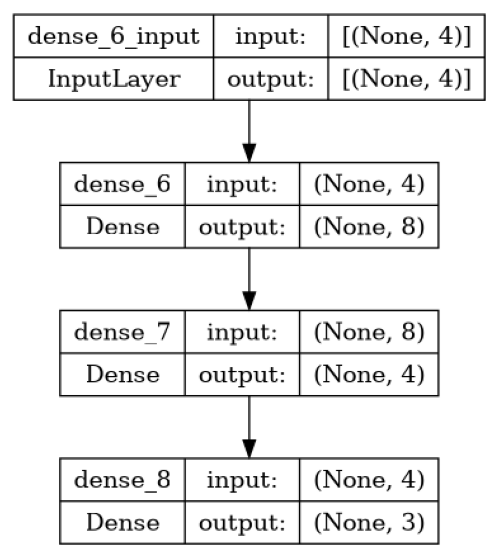

In [25]:
#plotting the model 
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)
plt.figure(figsize=(10, 10))
plt.imshow(plt.imread('model.png'))
plt.axis('off')
plt.show()

epochs=100 means 100 iterations, to_categorical() converts the target into one hot encoding as we have 3 classes we need numerical values for each class
We are also using Tensorboard to visualize the training process.

In [26]:
#training the model
from tensorflow.keras.callbacks import TensorBoard
model.fit(X_train, to_categorical(y_train), epochs=20, callbacks=[TensorBoard('Iris_logs')]) 

#Start a Tensorboard session by pasting this in the terminal: tensorboard --logdir logs/ 

Epoch 1/20
4/4 [==============================] - 0s 4ms/step - loss: 0.2230 - accuracy: 0.3250
Epoch 2/20
4/4 [==============================] - 0s 4ms/step - loss: 0.2220 - accuracy: 0.3583
Epoch 3/20
4/4 [==============================] - 0s 3ms/step - loss: 0.2217 - accuracy: 0.3667
Epoch 4/20
4/4 [==============================] - 0s 3ms/step - loss: 0.2228 - accuracy: 0.3667
Epoch 5/20
4/4 [==============================] - 0s 3ms/step - loss: 0.2219 - accuracy: 0.3667
Epoch 6/20
4/4 [==============================] - 0s 5ms/step - loss: 0.2217 - accuracy: 0.3667
Epoch 7/20
4/4 [==============================] - 0s 4ms/step - loss: 0.2218 - accuracy: 0.3667
Epoch 8/20
4/4 [==============================] - 0s 5ms/step - loss: 0.2219 - accuracy: 0.3667
Epoch 9/20
4/4 [==============================] - 0s 4ms/step - loss: 0.2218 - accuracy: 0.3667
Epoch 10/20
4/4 [==============================] - 0s 4ms/step - loss: 0.2217 - accuracy: 0.3667
Epoch 11/20
4/4 [======================

Text(0.5, 0, 'Epochs')

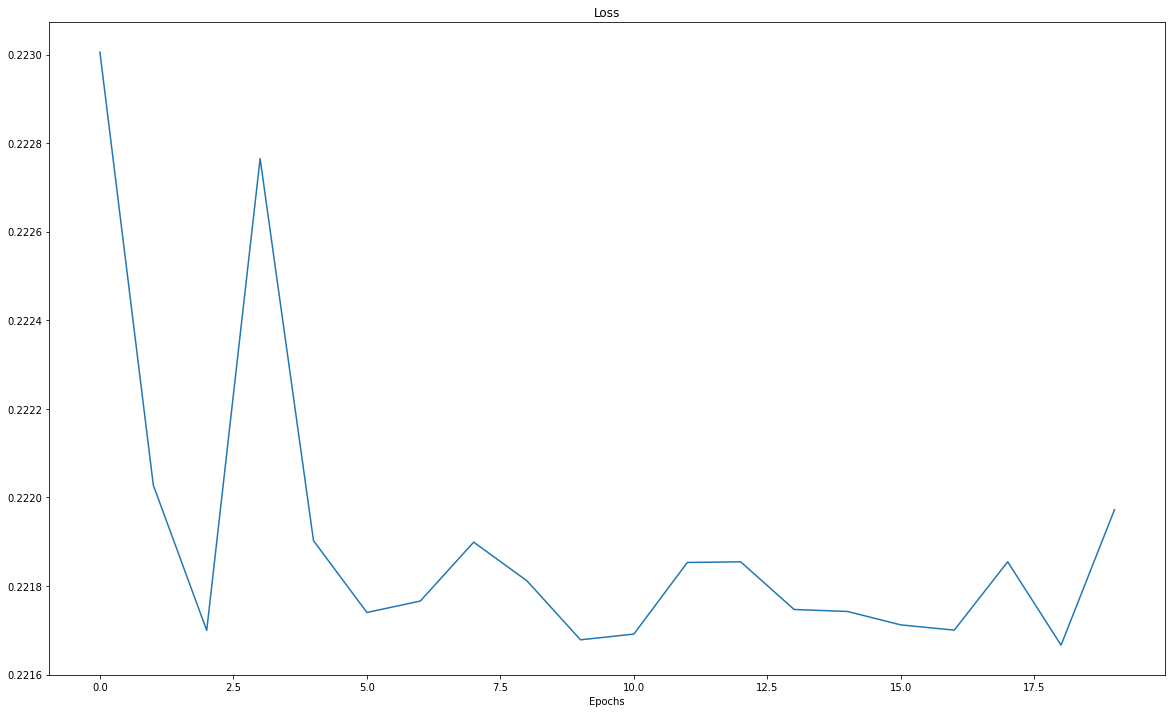

In [27]:
#plotting the loss and accuracy
plt.plot(model.history.history['loss'])
plt.title('Loss')
plt.xlabel('Epochs')

Text(0.5, 0, 'Epochs')

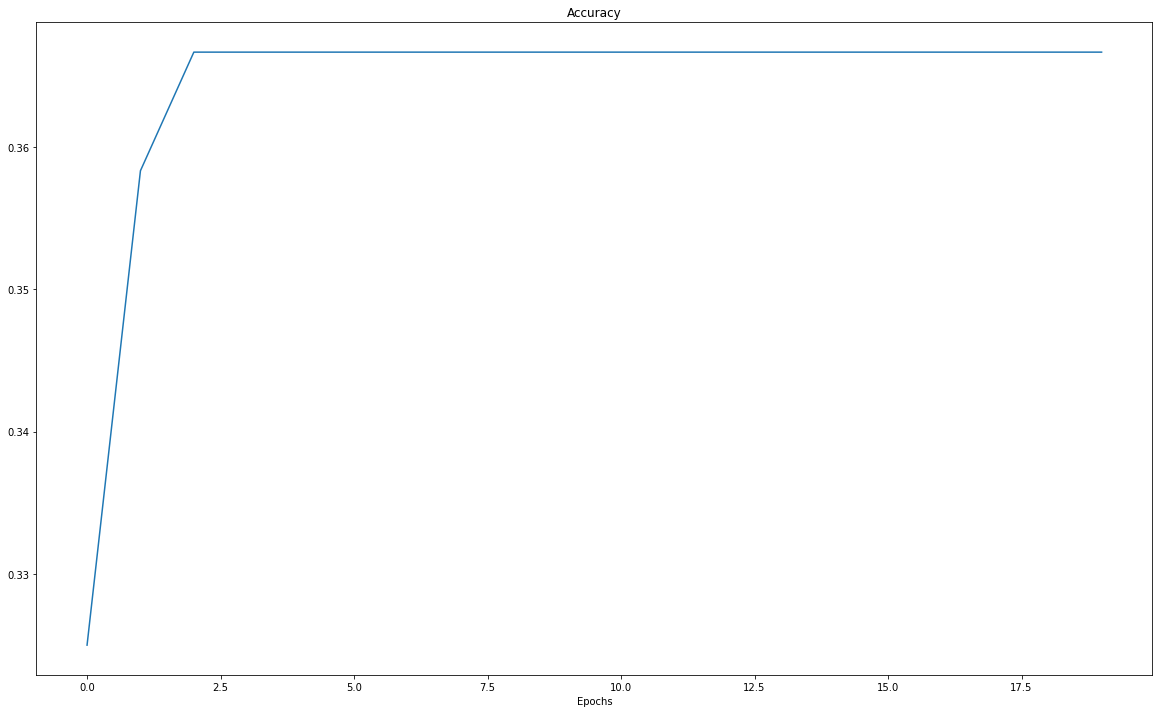

In [28]:
#plotting the accuracy
plt.plot(model.history.history['accuracy'])
plt.title('Accuracy')
plt.xlabel('Epochs')

In [29]:
#evaluating the model
model.evaluate(X_test, to_categorical(y_test))

1/1 [==============================] - 0s 85ms/step - loss: 0.2284 - accuracy: 0.2000


[0.22842369973659515, 0.20000000298023224]

In [30]:
#using breast Cancer dataset
X_train, X_test, y_train, y_test = train_test_split(breast_cancer.data, breast_cancer.target, test_size=0.2) #test_size=0.2 means 20% of data is used for testing and 80% for training 

#building the model
model1 = Sequential([
    Dense(8, input_shape=(30,), activation='relu'),
    Dense(8, input_shape=(30,), activation='relu'),
    Dense(2, activation='softmax')
])
model1.compile(optimizer=Adam(lr=0.04), loss='binary_crossentropy', metrics=['accuracy']) #lr=learning rate, loss=loss function, metrics=accuracy
model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 8)                 248       
                                                                 
 dense_10 (Dense)            (None, 8)                 72        
                                                                 
 dense_11 (Dense)            (None, 2)                 18        
                                                                 
Total params: 338
Trainable params: 338
Non-trainable params: 0
_________________________________________________________________


In [31]:
#training the model
from tensorflow.keras.callbacks import TensorBoard
model1.fit(X_train, to_categorical(y_train), epochs=20, callbacks=[TensorBoard('Cancer_logs')])

Epoch 1/20
15/15 [==============================] - 0s 3ms/step - loss: 24.8032 - accuracy: 0.4527
Epoch 2/20
15/15 [==============================] - 0s 4ms/step - loss: 0.7042 - accuracy: 0.6330
Epoch 3/20
15/15 [==============================] - 0s 4ms/step - loss: 0.6880 - accuracy: 0.6308
Epoch 4/20
15/15 [==============================] - 0s 4ms/step - loss: 0.6654 - accuracy: 0.6220
Epoch 5/20
15/15 [==============================] - 0s 4ms/step - loss: 0.6651 - accuracy: 0.6176
Epoch 6/20
15/15 [==============================] - 0s 5ms/step - loss: 0.6658 - accuracy: 0.6176
Epoch 7/20
15/15 [==============================] - 0s 3ms/step - loss: 0.6654 - accuracy: 0.6176
Epoch 8/20
15/15 [==============================] - 0s 4ms/step - loss: 0.6654 - accuracy: 0.6176
Epoch 9/20
15/15 [==============================] - 0s 4ms/step - loss: 0.6655 - accuracy: 0.6176
Epoch 10/20
15/15 [==============================] - 0s 4ms/step - loss: 0.6660 - accuracy: 0.6176
Epoch 11/20
15/15 

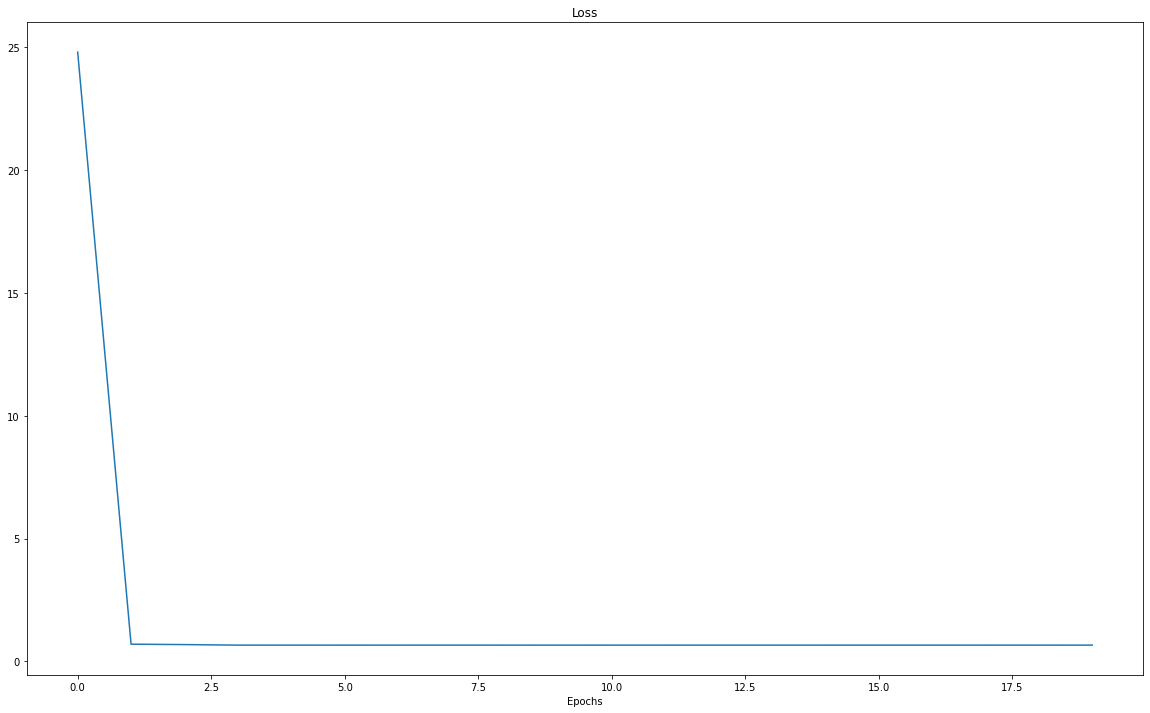

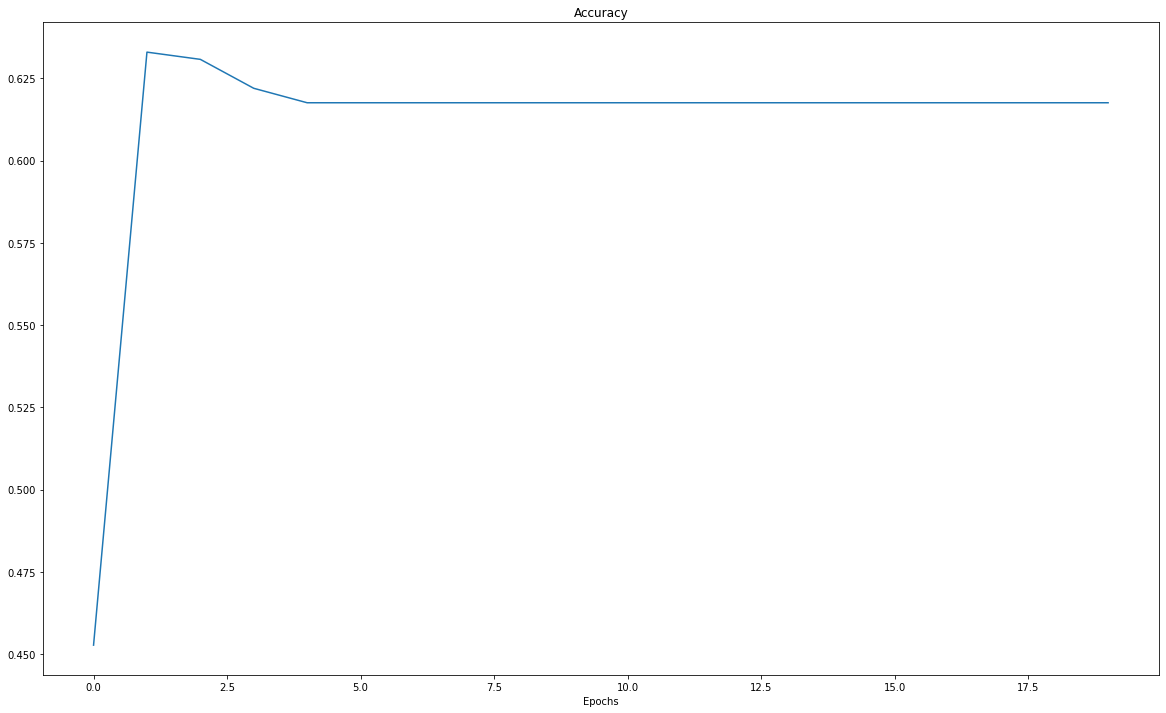

In [32]:
#plotting the loss and accuracy
plt.plot(model1.history.history['loss'])
plt.title('Loss')
plt.xlabel('Epochs')
plt.show()

#plotting the accuracy
plt.plot(model1.history.history['accuracy'])
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.show()


In [33]:
#evaluating the model
model1.evaluate(X_test, to_categorical(y_test))


4/4 [==============================] - 0s 3ms/step - loss: 0.6382 - accuracy: 0.6667


[0.6381908059120178, 0.6666666865348816]